2. Utilizando as bases de treinamento e testes disponivel no link: https://www.kaggle.com/c/houseprices-advanced-regression-techniques/data, apresente duas solucoes de aprendizagem de
maquina que consigam baixas taxas de erro medio (prove que esse e o menor valor que voce
pôde encontrar).
Dica:

• Teste com dois algoritmos de aprendizagem de maquina para identificar os que
apresentam melhores resultados; 

### Imports 

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
from sklearn.svm import SVR

#Abrindo as bases
dataset_train = pd.read_csv("train.csv")
dataset_test = pd.read_csv("test.csv")
#Configurando a máx visualização das bases
print(pd.options.display.max_columns, pd.options.display.max_rows)
pd.options.display.max_columns = 85
pd.options.display.max_rows = 1470
output_1 = pd.read_csv("sample_submission.csv")
output_1 = output_1.drop(["Id"], axis=1)

20 60


### 1. Análise dos dados

In [2]:
dataset_train.head

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60

In [3]:
dataset_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [4]:
dataset_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [5]:
dataset_test.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704   
std       1.113740    30.390071     21.130467   177.625900   455.268042   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.000000   1963.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1992.000000     0.000000   350.500000   
75%       6.000000  2001.000000   2004.000000   164.000000   753.500000   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1458.000000  1458.000000  1458.000000  1459.000000  1459.000000   
mean     52.619342   554.294925  1046.117970  1156.534613   325.967786   
std     176.753926   437.260486   442.898624   398.165820   420.610226   
min       0.000000     0.000000     0.000000   407.000000     0.000000   
25%       0.000000   219.250000   784.000000   873.500000     0.000000   
50%       0.000000   460.000000   988.000000  1079.000000     0.000000   
75%       0.000000   797.750000  1305.000000  1382.500000   676.000000   
max    1526.000000  2140.000000  5095.000000  5095.000000  1862.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1459.000000  1459.000000   1457.000000   1457.000000  1459.000000   
mean       3.543523  1486.045922      0.434454      0.065202     1.570939   
std       44.043251   485.566099      0.530648      0.252468     0.555190   
min        0.000000   407.000000      0.000000      0.000000     0.000000   
25%        0.000000  1117.500000      0.000000      0.000000     1.000000   
50%        0.000000  1432.000000      0.000000      0.000000     2.000000   
75%        0.000000  1721.000000      1.000000      0.000000     2.000000   
max     1064.000000  5095.000000      3.000000      2.000000     4.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
count  1459.000000   1459.000000   1459.000000   1459.000000  1459.00000   
mean      0.377656      2.854010      1.042495      6.385195     0.58122   
std       0.503017      0.829788      0.208472      1.508895     0.64742   
min       0.000000      0.000000      0.000000      3.000000     0.00000   
25%       0.000000      2.000000      1.000000      5.000000     0.00000   
50%       0.000000      3.000000      1.000000      6.000000     0.00000   
75%       1.000000      3.000000      1.000000      7.000000     1.00000   
max       2.000000      6.000000      2.000000     15.000000     4.00000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1381.000000  1458.000000  1458.000000  1459.000000  1459.000000   
mean   1977.721217     1.766118   472.768861    93.174777    48.313914   
std      26.431175     0.775945   217.048611   127.744882    68.883364   
min    1895.000000     0.000000     0.000000     0.000000     0.000000   
25%    1959.000000     1.000000   318.000000     0.000000     0.000000   
50%    1979.000000     2.000000   480.000000     0.000000    28.000000   
75%    2002.000000     2.000000   576.000000   168.000000    72.000000   
max    2207.000000     5.0

Verificando a existência de instâncias nulas

In [6]:
dataset_train.isnull().values.any()


True

In [7]:
dataset_test.isnull().values.any()

True

Descobrindo a correlação entre as colunas e SalePrice

In [8]:
correlations = dataset_train.corr()
correlations = correlations["SalePrice"].sort_values(ascending=False)
features = correlations.index[1:6]
#correlations

Decobrindo quais colunas tem valores nulos

In [9]:
training_null = pd.isnull(dataset_train).sum()
testing_null = pd.isnull(dataset_test).sum()

null = pd.concat([training_null, testing_null], axis=1, keys=["Training", "Testing"])
null_n = null[(null.sum(axis=1) > 0)]  #valor faltando mas nem tanto assim
#Exibindo as colunas que possuem valores nulos
null_n

Training  Testing
Alley             1369   1352.0
BsmtCond            37     45.0
BsmtExposure        38     44.0
BsmtFinSF1           0      1.0
BsmtFinSF2           0      1.0
BsmtFinType1        37     42.0
BsmtFinType2        38     42.0
BsmtFullBath         0      2.0
BsmtHalfBath         0      2.0
BsmtQual            37     44.0
BsmtUnfSF            0      1.0
Electrical           1      0.0
Exterior1st          0      1.0
Exterior2nd          0      1.0
Fence             1179   1169.0
FireplaceQu        690    730.0
Functional           0      2.0
GarageArea           0      1.0
GarageCars           0      1.0
GarageCond          81     78.0
GarageFinish        81     78.0
GarageQual          81     78.0
GarageType          81     76.0
GarageYrBlt         81     78.0
KitchenQual          0      1.0
LotFrontage        259    227.0
MSZoning             0      4.0
MasVnrArea           8     15.0
MasVnrType           8     16.0
MiscFeature       1406   1408.0
PoolQC            1453   1456.0
SaleType             0      1.0
TotalBsmtSF          0      1.0
Utilities            0      2.0

Transformando colunas NaN, Na, Po e No em zero

In [10]:
null_has_meaning = [ "Alley", "BsmtCond", "BsmtExposure", "BsmtFinSF1", 
    "BsmtFinSF2", "BsmtFinType1", "BsmtFinType2", 
    "BsmtFullBath", "BsmtHalfBath", "BsmtQual", 
    "BsmtUnfSF", "Electrical", "Exterior1st", 
    "Exterior2nd", "Fence", "FireplaceQu", "Functional",
    "GarageArea", "GarageCars", "GarageCond", "GarageFinish",
    "GarageQual", "GarageType", "GarageYrBlt", "KitchenQual",
    "LotFrontage", "MSZoning", "MasVnrArea", "MasVnrType",
    "MiscFeature", "PoolQC", "SaleType", "TotalBsmtSF",
    "Utilities"
    ]
for i in null_has_meaning:
    dataset_train[i].fillna(0, inplace=True)
    dataset_test[i].fillna(0, inplace=True)
    
dataset_train.replace(to_replace ="No", value =0) 
dataset_test.replace(to_replace ="No", value =0)
dataset_train.replace(to_replace ="Na", value =0) 
dataset_test.replace(to_replace ="Na", value =0)
dataset_train.replace(to_replace ="Po", value =0) 
dataset_test.replace(to_replace ="Po", value =0) 

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave     0      Reg   
1     1462          20       RL         81.0    14267   Pave     0      IR1   
2     1463          60       RL         74.0    13830   Pave     0      IR1   
3     1464          60       RL         78.0     9978   Pave     0      IR1   
4     1465         120       RL         43.0     5005   Pave     0      IR1   
5     1466          60       RL         75.0    10000   Pave     0      IR1   
6     1467          20       RL          0.0     7980   Pave     0      IR1   
7     1468          60       RL         63.0     8402   Pave     0      IR1   
8     1469          20       RL         85.0    10176   Pave     0      Reg   
9     1470          20       RL         70.0     8400   Pave     0      Reg   
10    1471         120       RH         26.0     5858   Pave     0      IR1   
11    1472         160       RM         21.0     1680   Pave     0      Reg   
12    1473         160       RM         21.0     1680   Pave     0      Reg   
13    1474         160       RL         24.0     2280   Pave     0      Reg   
14    1475         120       RL         24.0     2280   Pave     0      Reg   
15    1476          60       RL        102.0    12858   Pave     0      IR1   
16    1477          20       RL         94.0    12883   Pave     0      IR1   
17    1478          20       RL         90.0    11520   Pave     0      Reg   
18    1479          20       RL         79.0    14122   Pave     0      IR1   
19    1480          20       RL        110.0    14300   Pave     0      Reg   
20    1481          60       RL        105.0    13650   Pave     0      Reg   
21    1482         120       RL         41.0     7132   Pave     0      IR1   
22    1483          20       RL        100.0    18494   Pave     0      IR1   
23    1484         120       RL         43.0     3203   Pave     0      Reg   
24    1485          80       RL         67.0    13300   Pave     0      IR1   
25    1486          60       RL         63.0     8577   Pave     0      IR1   
26    1487          60       RL         60.0    17433   Pave     0      IR2   
27    1488          20       RL         73.0     8987   Pave     0      Reg   
28    1489          20       FV         92.0     9215   Pave     0      Reg   
29    1490          20       FV         84.0    10440   Pave     0      Reg   
30    1491          60       RL         70.0    11920   Pave     0      Reg   
31    1492          30       RH         70.0     9800   Pave     0      Reg   
32    1493          20       RL         39.0    15410   Pave     0      IR1   
33    1494          60       RL         85.0    13143   Pave     0      IR1   
34    1495          60       RL         88.0    11134   Pave     0      Reg   
35    1496         120       FV         25.0     4835   Pave     0      IR1   
36    1497         160       FV         39.0     3515   Pave  Pave      Reg   
37    1498         160       FV         30.0     3215   Pave  Pave      Reg   
38    1499         160       FV         24.0     2544   Pave  Pave      Reg   
39    1500         160       FV         24.0     2544   Pave  Pave      Reg   
40    1501         160       FV          0.0     2980   Pave     0      Reg   
41    1502         160       FV          0.0     2403   Pave     0      IR1   
42    1503          20       FV         57.0    12853   Pave  Pave      IR1   
43    1504          60       FV         68.0     7379   Pave     0      IR1   
44    1505          20       FV         80.0     8000   Pave     0      Reg   
45    1506          20       RL          0.0    10456   Pave     0      IR1   
46    1507          60       RL         80.0    10791   Pave     0      Reg   
47    1508          50       RL          0.0    18837   Pave     0      IR1   
48    1509          60       RL         80.0     9600   Pave     0      Reg   
49    1510          20       RL         80.0     9600   Pa

verificando novamente se ainda existe instâncias nulas

In [11]:
dataset_train.isnull().values.any()


False

In [12]:
dataset_test.isnull().values.any()

False

Separando tipo objetivo de inteiro dos dataset


In [13]:
types_train = dataset_train.dtypes #type of each feature in data: int, float, object
num_train = types_train[(types_train == int) | (types_train == float)] #numerical values are either type int or float
cat_train = types_train[types_train == object] #categorical values are type object

#we do the same for the test set
types_test = dataset_test.dtypes
num_test = types_test[(types_test == int) | (types_test == float)]
cat_test = types_test[types_test == object]

In [14]:
#convertendo para lista
numerical_values_train = list(num_train.index)
numerical_values_test = list(num_test.index)
print(numerical_values_train)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [15]:
fill_num = []

for i in numerical_values_train:
    if i in list(null_n.index):
        fill_num.append(i)
print(fill_num)


['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']


In [16]:
#Criando as listas com as colunas
categorical_values_train = list(cat_train.index)
categorical_values_test = list(cat_test.index)


In [17]:
fill_cat = []

for i in categorical_values_train:
    if i in list(null_n.index):
        fill_cat.append(i)
print(fill_cat)


['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


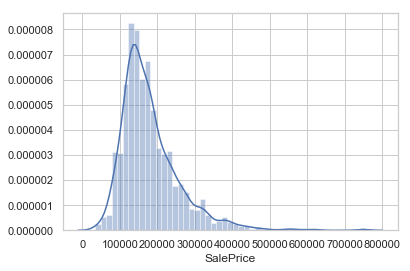

In [18]:
#Histograma Saleprice
sns.distplot(dataset_train["SalePrice"])

In [19]:
categorical_values_train = list(cat_train.index)
categorical_values_test = list(cat_test.index)

In [20]:
for i in categorical_values_train:
    feature_set = set(dataset_train[i])
    for j in feature_set:
        feature_list = list(feature_set)
        dataset_train.loc[dataset_train[i] == j, i] = feature_list.index(j)

for i in categorical_values_test:
    feature_set2 = set(dataset_test[i])
    for j in feature_set2:
        feature_list2 = list(feature_set2)
        dataset_test.loc[dataset_test[i] == j, i] = feature_list2.index(j)

In [21]:
corr = dataset_train.corr()
corr.style.background_gradient(cmap='coolwarm')

In [22]:
#Estas duas colunas tem correlação muito alta com Saleprice e outras colunas , então achei melhor excluir
dataset_train = dataset_train.drop(["GrLivArea","TotalBsmtSF"], axis=1)
dataset_test = dataset_test.drop(["GrLivArea","TotalBsmtSF"], axis=1)

### Aplicando os métodos

In [90]:
import numpy as np
import pandas as pd
from scipy.stats import skew
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR

x_train = dataset_train.drop(["Id", "SalePrice"], axis=1)
y_train = dataset_train["SalePrice"]
X_test = dataset_test.drop(["Id"], axis=1)

svr = make_pipeline(RobustScaler(), SVR(C=40, epsilon=0.008, gamma=0.0003))
cross_validation = KFold(n_splits=5, shuffle=True, random_state=2)
knn = KNeighborsRegressor(n_neighbors=87)

knn_model = knn.fit(x_train, y_train)
svr_model = svr.fit(x_train, y_train)

y_pred1 = svr_model.predict(X_test)
y_pred2 = knn_model.predict(X_test)

In [91]:
np.sqrt(mean_squared_error(output_1, y_pred1, multioutput='uniform_average'))

22957.696351363178

In [92]:
np.sqrt(mean_squared_error(output_1, y_pred2, multioutput='uniform_average'))

32471.90601051112

Algo muito errado aconteceu pois o valor do erro médio quadrático deu muito alto.
Mas na ciência coisas que dão errado também são aprendizagem :).
Acredito que o pré-processamento dos dados foi insatisfatório o que cabou gerando 
uma base bastante desbalanceada. Neste caso como existiam muitas colunas do obj 
que foram convertidas em inteiros e isso pode ter causado bastante problemas.


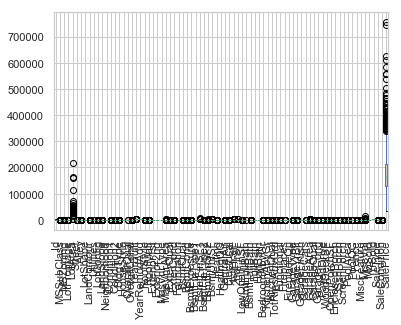

In [93]:
dataset_train.boxplot(rot=90)

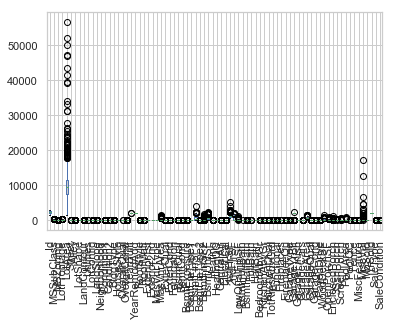

In [94]:
dataset_test.boxplot(rot=90)